In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest

pf = pd.read_csv("/Users/hayden/Downloads/Projects/fraud_detection/data/creditcard.csv")
pf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
pf.info()
pf.describe()
pf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

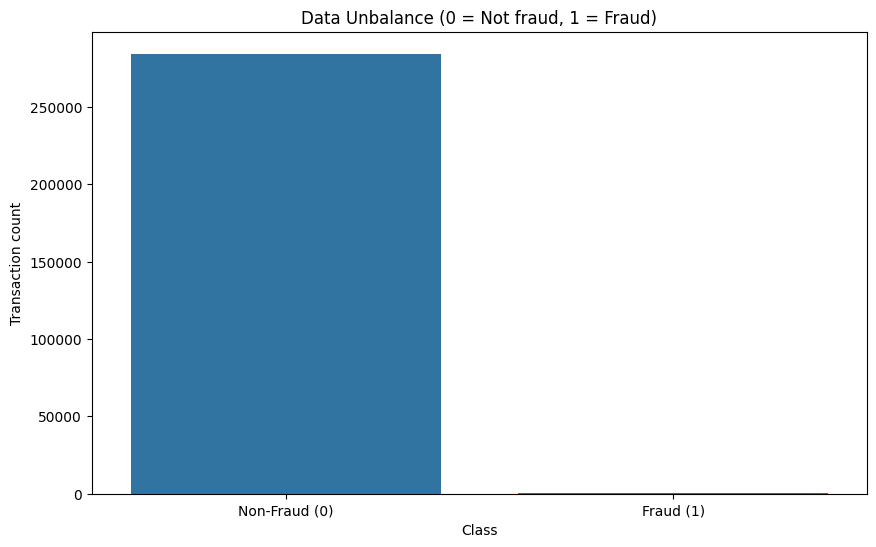

In [3]:
# Check data unbalance

counts = pf['Class'].value_counts()

plt.figure(figsize = (10,6))
sns.barplot(x = counts.index, y = counts.values)
plt.title('Data Unbalance (0 = Not fraud, 1 = Fraud)')
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Transaction count')
plt.show()

In [4]:
# Feature and Target 

X = pf.drop('Class', axis = 1)
y = pf['Class']
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [5]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(227845, 30) (227845,)
(56962, 30) (56962,)


In [6]:
# Logistic Regression

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=None)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

prec_log, rec_log, _ = precision_recall_curve(y_test, y_proba)
pr_auc_log = auc(rec_log, prec_log)

print("Logistic Regression")
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print('PR-AUC:', pr_auc_log)

Logistic Regression
              precision    recall  f1-score   support

           0     0.9999    0.9706    0.9850     56864
           1     0.0510    0.9184    0.0967        98

    accuracy                         0.9705     56962
   macro avg     0.5254    0.9445    0.5408     56962
weighted avg     0.9982    0.9705    0.9835     56962

ROC-AUC: 0.9734801366382231
PR-AUC: 0.7525542423888694


/Users/hayden/Downloads/Projects/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# #PR Curve Logistic Regression

# prec, rec, _ = precision_recall_curve(y_test, y_proba)
# plt.figure(figsize=(5,4))
# plt.plot(rec, prec, label="LogReg")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Precision–Recall Curve")
# plt.legend()
# plt.show()

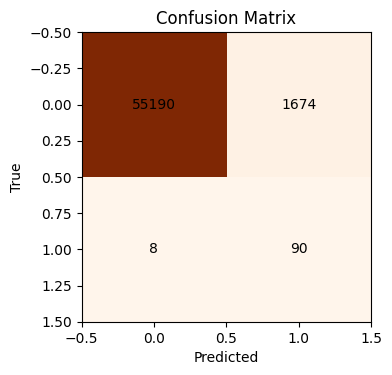

In [8]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap= "Oranges")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
for (i,j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha = 'center', va = 'center')
plt.tight_layout()
plt.show()

In [9]:
# SMOTE

sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print('Before SMOTE:', X_train.shape, y_train.sum())
print('After SMOTE:', X_train_sm.shape, y_train_sm.sum())

Before SMOTE: (227845, 30) 394
After SMOTE: (454902, 30) 227451


In [10]:
# SMOTE + Logistic Regression

logsm = LogisticRegression(max_iter=2000, solver='lbfgs')
logsm.fit(X_train_sm, y_train_sm)

y_pred_logsm = logsm.predict(X_test)
y_proba_logsm = logsm.predict_proba(X_test)[:, 1]

prec_logsm, rec_logsm, _ = precision_recall_curve(y_test, y_proba_logsm)
pr_auc_logsm = auc(rec_logsm, prec_logsm)

print('Logistic Regression with SMOTE Oversampling')
print(classification_report(y_test, y_pred_sm, digits= 4))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_logsm))
print('PR-AUC:', pr_auc_logsm)

Logistic Regression with SMOTE Oversampling


/Users/hayden/Downloads/Projects/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'y_pred_sm' is not defined

In [ ]:
# SMOTE + Random Forest

rfsm = RandomForestClassifier(class_weight= 'balanced', random_state=42, n_jobs=-1)
rfsm.fit(X_train_sm, y_train_sm)

y_pred_rfsm = rfsm.predict(X_test)
y_proba_rfsm = rfsm.predict_proba(X_test)[:, 1]

prec_rfsm, rec_rfsm, _ = precision_recall_curve(y_test, y_proba_rfsm)
pr_auc_rfsm = auc(rec_rfsm, prec_rfsm)

print('Random Forest with SMOTE Oversampling')
print(classification_report(y_test, y_pred_rfsm, digits= 4))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_rfsm))
print('PR-AUC:', pr_auc_rfsm)

Random Forest with SMOTE Oversampling
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8265    0.8265    0.8265        98

    accuracy                         0.9994     56962
   macro avg     0.9131    0.9131    0.9131     56962
weighted avg     0.9994    0.9994    0.9994     56962

ROC-AUC: 0.9644212865928589
PR-AUC: 0.8752993616394724


In [ ]:
# Random Forest

rf = RandomForestClassifier(class_weight= 'balanced', random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits = 4))

prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)

print(f'ROC-AUC:', roc_auc_score(y_test, y_prob_rf))
print(f'PR-AUC:', auc(rec_rf, prec_rf))

Random Forest
[[56861     3]
 [   25    73]]
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC-AUC: 0.9529119962560151
PR-AUC: 0.8600195248697491


In [ ]:
# Isolation Forest

iso = IsolationForest(contamination=0.0017, random_state=42, n_jobs=-1)

iso.fit(X_train)

y_pred_iso = iso.predict(X_test)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

prec_iso, rec_iso, _ = precision_recall_curve(y_test, y_pred_iso)

print('Isolation Forest')
print(confusion_matrix(y_test, y_pred_iso))
print(classification_report(y_test, y_pred_iso, digits=4))

print('ROC-AUC:', roc_auc_score(y_test,y_proba))
print('PR-AUC:', auc(rec_iso, prec_iso))

Isolation Forest
[[56791    73]
 [   65    33]]
              precision    recall  f1-score   support

           0     0.9989    0.9987    0.9988     56864
           1     0.3113    0.3367    0.3235        98

    accuracy                         0.9976     56962
   macro avg     0.6551    0.6677    0.6612     56962
weighted avg     0.9977    0.9976    0.9976     56962

ROC-AUC: 0.9734801366382231
PR-AUC: 0.324598280106402


In [ ]:
# Table Comparison

comparisons = {"Model": [ 'Logistic Regression', 'Logistic Regression + SMOTE', 'Random Forest', 'Random Forest + SMOTE', 'Isolation Forest'],
               'Precision': [5.10, 12.48 , 96.05, 82.65, 31.13],
               'Recall' : [91.84, 89.90 , 74.49, 82.65, 33.67],
               'F1-Score': [9.67, 21.92 ,83.91, 82.65, 32.35],
               'ROC-AUC': [97.35, 97.53, 95.29, 96.44, 97.35],
               'PR-AUC': [75.26, 78.58, 86.00, 87.53, 32.46]}

df_comp = pd.DataFrame(comparisons)

print(df_comp)

#

                         Model  Precision  Recall  F1-Score  ROC-AUC  PR-AUC
0          Logistic Regression       5.10   91.84      9.67    97.35   75.26
1  Logistic Regression + SMOTE      12.48   89.90     21.92    97.53   78.58
2                Random Forest      96.05   74.49     83.91    95.29   86.00
3        Random Forest + SMOTE      82.65   82.65     82.65    96.44   87.53
4             Isolation Forest      31.13   33.67     32.35    97.35   32.46


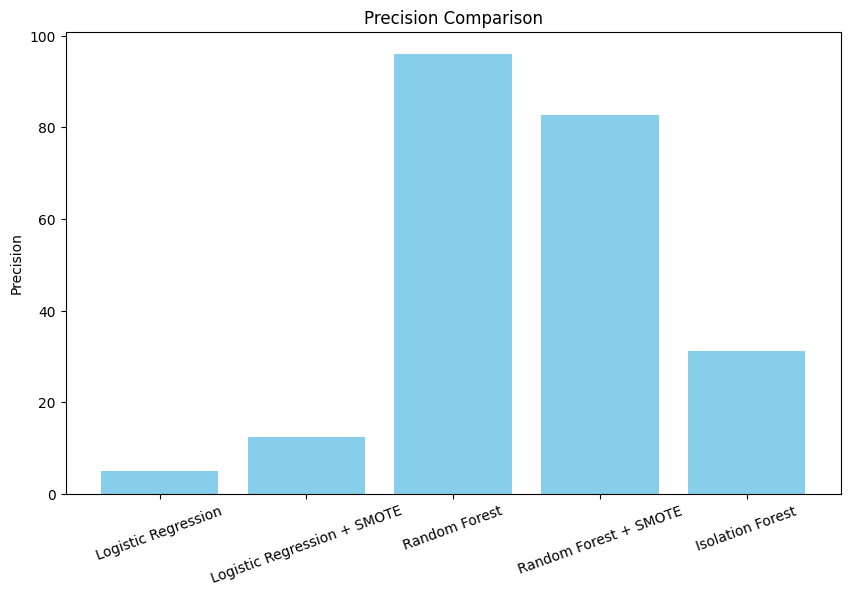

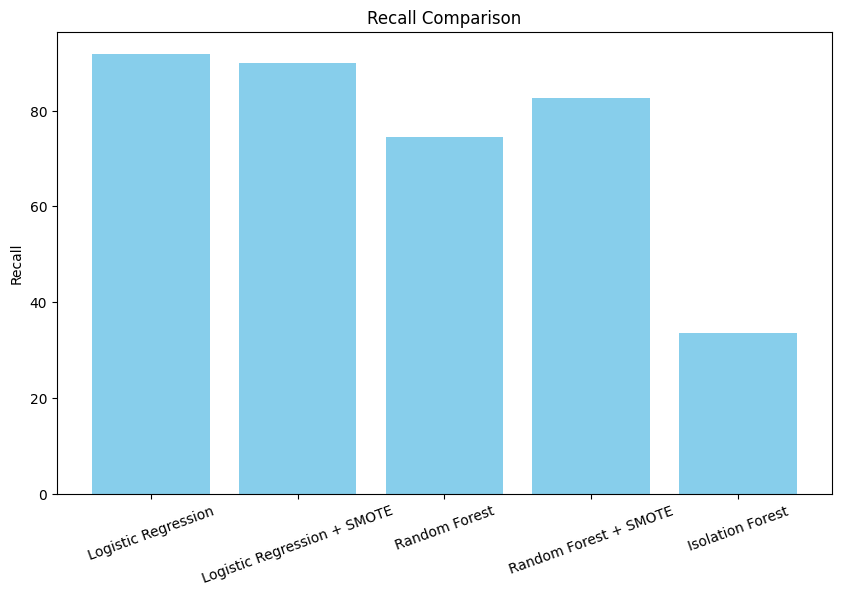

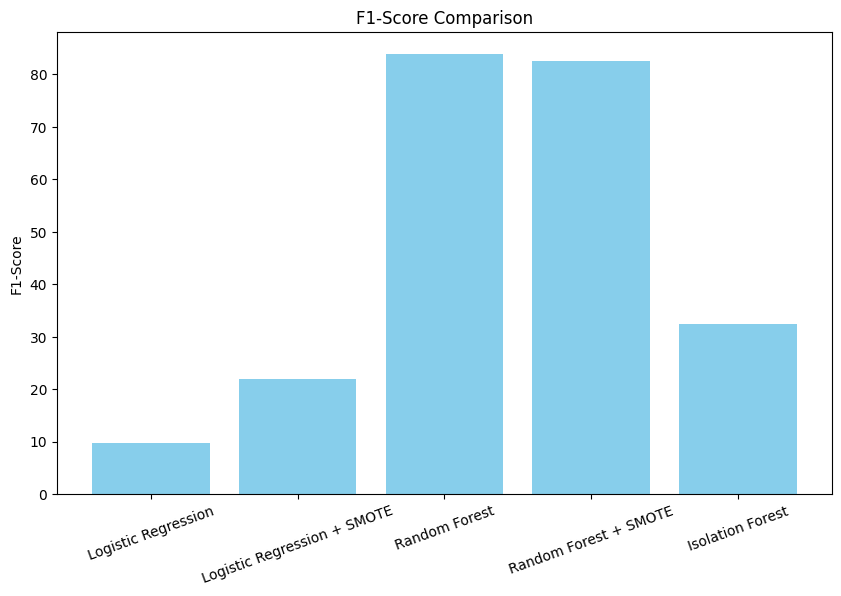

In [ ]:
# Bar Chart Comparison

df_comp = pd.DataFrame(comparisons)

for conv in ['Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC']:
    df_comp[conv] = pd.to_numeric(df_comp[conv])

# Precision
plt.figure(figsize= (10,6))
plt.bar(df_comp['Model'], df_comp['Precision'], color = 'skyblue')
plt.ylabel('Precision')
plt.title("Precision Comparison")
plt.xticks(rotation = 20)
plt.show()

# Recall
plt.figure(figsize= (10,6))
plt.bar(df_comp['Model'], df_comp['Recall'], color = 'skyblue')
plt.ylabel('Recall')
plt.title("Recall Comparison")
plt.xticks(rotation = 20)
plt.show()

# F1 Score
plt.figure(figsize= (10,6))
plt.bar(df_comp['Model'], df_comp['F1-Score'], color = 'skyblue')
plt.ylabel('F1-Score')
plt.title("F1-Score Comparison")
plt.xticks(rotation = 20)
plt.show()

In [ ]:
# # Conclusion

# - Firstly, the data is highly imbalance which makes PR-AUC and recall more significant evaluation metrics than other factors, even accuracy.
# - Logistic regression achieved high recall rate but the downside is that it has low precision rate. If the user is looking for not missing a fraud, it might be a good model but we have to keep in mind that high flag rate means the customer(the user who is being protected by the system) might not consider the flag important after couple of false flags
# - Logistic regression with smote did improve precision from logistic regression but still the precision rate is not good enough for users to rely on.
# - Random forest achieved high precision rate with good recall rate. Random forest also returned high PR-Auc score. This indicates that random forest is a better model than logistic regression.
# - Random forest with smote improved the recall rate from original random forest. Random forest with smote returned slightly higher ROC-AUC and PR-AUC score, meaning random forest with SMOTE is a better fit for prediction model over random forest without SMOTE
# - Isolation forest significantly underperfomed compared to other models